In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
file = '../data/tmp/epsilon.csv'
epsilon_data = pd.read_csv(file, index_col=0)

In [86]:
file = '../data/tmp/gamma_1.csv'
gamma_data = pd.read_csv(file, index_col=0)

In [100]:
file = '../data/tmp/beta_a.csv'
beta_a_data = pd.read_csv(file, index_col=0)

In [31]:
from scipy.stats import laplace

In [81]:
x = np.linspace(-2, 2, 100)

/home/dblux/anaconda3/envs/r-1/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dblux/anaconda3/envs/r-1/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


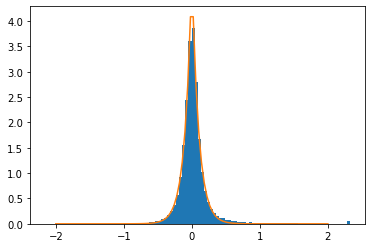

In [83]:
eps = epsilon_data.to_numpy().flatten()
eps = eps[eps != 0]
log_eps = np.log2(eps)
laplace_pdf = laplace(scale = .1)

fig, ax = plt.subplots(1, 1)
_ = ax.hist(log_eps, bins=100, density=True)
ax.plot(x, laplace_pdf.pdf(x))

/home/dblux/anaconda3/envs/r-1/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dblux/anaconda3/envs/r-1/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


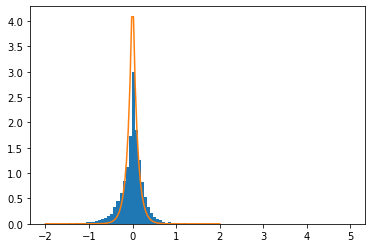

In [139]:
gamma = gamma_data.to_numpy()
k = 5
gamma_k = gamma[:, k]
log_gamma_k = np.log2(gamma_k[gamma_k != 0])
frozen_laplace = laplace(scale = .1)

fig, ax = plt.subplots(1, 1)
_ = ax.hist(log_gamma_k, bins=100, density=True)
ax.plot(x, frozen_laplace.pdf(x))

/home/dblux/anaconda3/envs/r-1/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dblux/anaconda3/envs/r-1/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


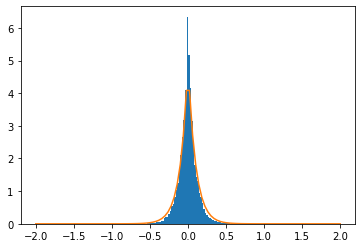

In [140]:
beta_a = beta_a_data.to_numpy()
beta_a_k = beta_a[:, 2]
log_beta_a_k = np.log2(beta_a_k[beta_a_k != 0])
frozen_laplace = laplace(scale = .1)

fig, ax = plt.subplots(1, 1)
_ = ax.hist(log_beta_a_k, bins=100, density=True)
ax.plot(x, frozen_laplace.pdf(x))

(0.0, 5.0)

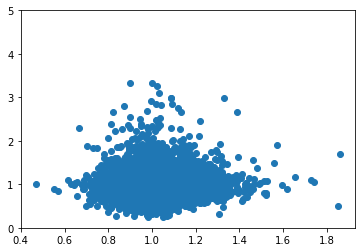

In [136]:
# no correlation between beta and gamma
fig, ax = plt.subplots(1, 1)
ax.scatter(beta_a_k, gamma_k)
# ax.set_xlim(0, 2)
ax.set_ylim(0, 5)

In [157]:
y = frozen_laplace.rvs(size=1000)
z = frozen_laplace.rvs(size=1000)
yz = y + z

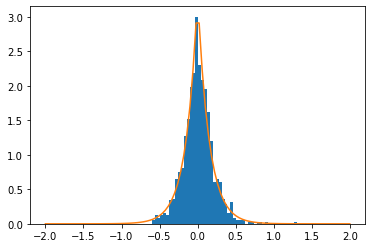

In [165]:
# distribution of addition of two laplace r.v.s
# laplace with larger scale
fig, ax = plt.subplots(1, 1)
_ = ax.hist(yz, bins=50, density=True)
ax.plot(x, laplace.pdf(x, scale=.15))
# ax.set_xlim(0, 2)
# ax.set_ylim(0, 5)